In [18]:
import re
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
data=pd.read_csv('hindi_data.csv')

In [20]:
data.head()

,text,sentiment
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [21]:
data.dropna(inplace=True)

In [22]:
def preprocess_and_clean_hindi(text):
    
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens

    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    # Tokenize the text
    tokens = preprocess_text_hindi(text)

    cleaned_text = list(map(remove_non_hindi,tokens))

    return cleaned_text

def preprocess_and_clean_hindi_ng(text):
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens
        
    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    tokens = preprocess_text_hindi(text)

    cleaned_text = " ".join([remove_non_hindi(token) for token in tokens])

    return cleaned_text


data['tokenized_text'] = data['text'].apply(preprocess_and_clean_hindi)

data['concated_text'] = data['text'].apply(preprocess_and_clean_hindi_ng)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})


In [23]:
data = data[data['label'] != 2]

In [24]:
def generate_embedding_vector(word_vector, word2vec_model):
    word_embeddings = []
    for word in word_vector:
        if word in word2vec_model.wv:
            word_embedding = word2vec_model.wv[word]
            word_embeddings.append(word_embedding)

    embedding_vector = np.sum(word_embeddings, axis=0)
    return embedding_vector


In [25]:
tokenized_corpus=data['tokenized_text'].to_list()

In [26]:
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [27]:
data['embedding_vector'] = data['tokenized_text'].apply(lambda x: generate_embedding_vector(x, word2vec_model))

In [28]:
X = np.array(data['embedding_vector'].tolist())

In [29]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_ngram = ngram_vectorizer.fit_transform(data['concated_text'])

In [30]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(data['concated_text'])

In [31]:
tsne = TSNE(n_components=2, random_state=42, init='random')

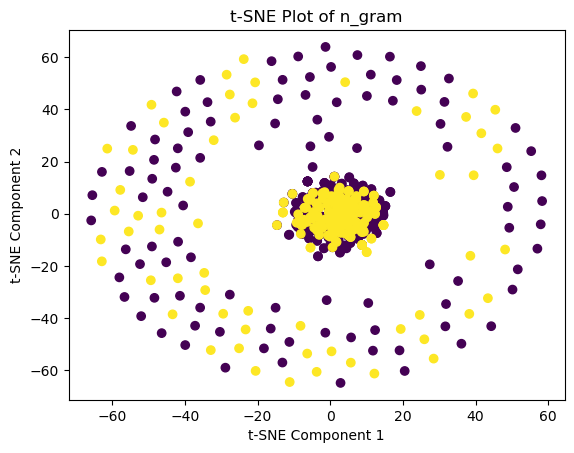

In [32]:
tsne_result_ngram = tsne.fit_transform(X_ngram[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_ngram[:, 0], tsne_result_ngram[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of n_gram')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

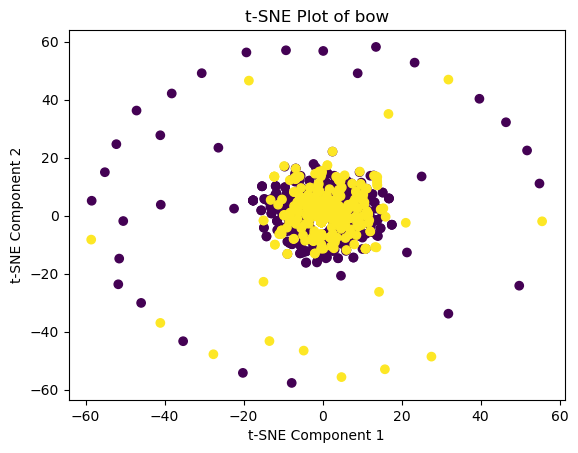

In [33]:
tsne_result_bow = tsne.fit_transform(X_bow[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_bow[:, 0], tsne_result_bow[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of bow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

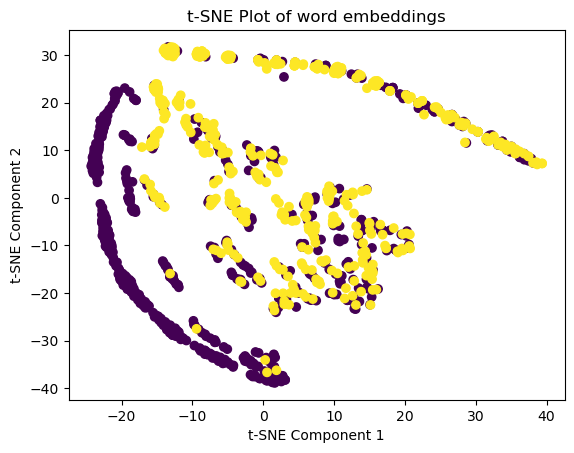

In [34]:
tsne_result_we = tsne.fit_transform(X[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_we[:, 0], tsne_result_we[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of word embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()